In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras import initializers
import math 
from tensorflow import keras
import statistics 
from sklearn import metrics
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("C:/Users/Yingxing Huang/Desktop/Compsci 361 Machine Learning/A3 Group Project/Data/A3")
"""data preprocessing"""
# load the data
train_data = pd.read_csv ("train.csv")
test_data = pd.read_csv ("test.csv")

"""vectorisation""" 
# combine two train set and test set
full_data = pd.concat([train_data, test_data], axis=0)
text = full_data['Text']
# Term Frequency - Inverse Document Frequency (TF - IDF)
vectorizor = TfidfVectorizer() 
vectorizor.fit (text)
# encode article 
vector = vectorizor.transform(text)

"""recover the split"""
train_X = vector[:428].toarray()
test_X = vector[428:].toarray()
train_y_bool = list(train_data ['Category'] == "tech")
test_y_bool = list(test_data ['Category'] == "tech")
train_y = np.array(list(map(int, train_y_bool)))
test_y =  np.array(list(map(int, test_y_bool)))
train_X.shape

(428, 14927)

In [3]:
def build_NN (h):
    initializer = initializers.RandomUniform(minval = 0, maxval = 0.1, seed=None)
    nn_model = Sequential ()
    nn_model.add (Dense(h, input_dim = train_X.shape[1], activation = 'relu', kernel_initializer = initializer) )  # hidden layer: a dense layer that is fully connected
    nn_model.add(Dense(1, activation = 'sigmoid', kernel_initializer = initializer))   # ouput layer
    
    # define optimiser and initialise weights 
    opt = keras.optimizers.Adam(learning_rate = 0.01)
    # compile the model
    nn_model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    return nn_model

# Assessment of Model Perforance (5-fold cross-validation) for NN

### Tunable Hyperparameters 

1. number of neurons in the hidden layer
2. activation functions
3. weight initialisation 
4. batch and epoch 
5. optimisation algorithm
6. learning rate and momentum 

In [4]:
# Wrap keras model so that it can be used by scikit-learn functions
NN_classifier = KerasClassifier (build_fn = build_NN)

# define the grid search parameters
batchSize = [30, 60, 90]
epochs = [30, 70, 100]
hiddenUnits = [5, 20, 50]
parameter_grid = dict (batch_size = batchSize, epochs = epochs, h = hiddenUnits)

mygrid = GridSearchCV (estimator = NN_classifier, param_grid = parameter_grid, n_jobs = -1, cv = 5, return_train_score = True)
grid_result = mygrid.fit(train_X, train_y)

Epoch 1/70
15/15 [==============================] - 0s 6ms/step - loss: 0.6318 - accuracy: 0.6121
Epoch 2/70
15/15 [==============================] - 0s 9ms/step - loss: 0.2569 - accuracy: 0.9907
Epoch 3/70
15/15 [==============================] - 0s 12ms/step - loss: 0.0403 - accuracy: 0.9977
Epoch 4/70
15/15 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 5/70
15/15 [==============================] - 0s 6ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 6/70
15/15 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 7/70
15/15 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/70
15/15 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/70
15/15 [==============================] - 0s 6ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 10/70
15/15 [==============================] - 0s 8ms/step - loss: 9.3126e-04 - accuracy: 1.0000
Epoch 11/70
15

In [5]:
# best result 
print ("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.988317 using {'batch_size': 30, 'epochs': 70, 'h': 20}


In [6]:
grid_result.cv_results_

{'mean_fit_time': array([ 8.44209208,  7.59220114, 11.23372893, 15.02497153, 15.90154529,
        22.69458842, 21.70834069, 24.96727872, 40.95626307,  6.8510077 ,
        10.22869835,  9.4139432 , 11.0764977 , 11.42153544, 17.44353075,
        17.29066806, 19.61464324, 25.83311925,  7.1802002 ,  9.1377429 ,
         6.7248589 , 11.80516443, 11.56415596, 14.88258257, 17.8494669 ,
        13.80172729, 22.88486419]),
 'std_fit_time': array([1.06431677, 0.71575764, 0.91851857, 2.19829064, 1.08065328,
        2.6028493 , 1.816558  , 2.5989291 , 6.66972334, 0.5957852 ,
        4.23549844, 3.11651819, 2.96495201, 2.06980854, 2.59102903,
        3.43795242, 4.15699331, 4.39613957, 2.69501938, 4.20130192,
        1.32011503, 3.3492738 , 4.23092184, 3.22208496, 4.24253118,
        2.06330299, 5.02945054]),
 'mean_score_time': array([0.61815557, 0.90181031, 4.18718543, 0.86168704, 2.87932024,
        5.74985662, 1.16952748, 1.3294229 , 1.3624238 , 0.74328842,
        0.7631916 , 0.8726593 , 0.933

## Train Accuracy

In [7]:
train_accuracy = grid_result.cv_results_['mean_train_score']
train_accuracy

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Validation Accuracy

In [8]:
validation_accuracy = grid_result.cv_results_['mean_test_score']
validation_accuracy

array([0.95797538, 0.98596443, 0.98599179, 0.96733242, 0.98831737,
       0.98599179, 0.96965801, 0.98831737, 0.98599179, 0.89737346,
       0.98131326, 0.98131326, 0.94867306, 0.98363885, 0.98599179,
       0.94867305, 0.96730505, 0.98366621, 0.855513  , 0.98131326,
       0.98366621, 0.9253078 , 0.98128591, 0.98131326, 0.92533517,
       0.98363885, 0.98366621])

## Test Accuracy

In [9]:
test_accuracy = []
for b in batchSize:
    for e in epochs:
        for h in hiddenUnits:
            initializer = initializers.RandomUniform(minval = 0, maxval = 0.1, seed=None)
            nn_model = Sequential ()
            nn_model.add (Dense(h, input_dim = train_X.shape[1], activation = 'relu', kernel_initializer = initializer) )  # hidden layer: a dense layer that is fully connected
            nn_model.add(Dense(1, activation = 'sigmoid', kernel_initializer = initializer))   # ouput layer
            # define optimiser and initialise weights 
            opt = keras.optimizers.Adam(learning_rate = 0.01)
            # compile the model
            nn_model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
            # fit the model 
            nn_model.fit (train_X, train_y, epochs = e , batch_size = b, verbose = 0)
            y_pred = nn_model.predict_classes(test_X)
            test_accuracy.append(accuracy_score (test_y, y_pred))
test_accuracy

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


[0.9528301886792453,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 1.0,
 0.9716981132075472,
 0.9905660377358491,
 1.0,
 0.9150943396226415,
 0.9811320754716981,
 0.9811320754716981,
 0.9528301886792453,
 0.9905660377358491,
 0.9811320754716981,
 0.9528301886792453,
 0.9811320754716981,
 1.0,
 0.8584905660377359,
 0.9716981132075472,
 0.9905660377358491,
 0.9245283018867925,
 0.9811320754716981,
 0.9811320754716981,
 0.9433962264150944,
 0.9811320754716981,
 0.9905660377358491]

## Accuracy Table

In [10]:
param_batch_size = grid_result.cv_results_['param_batch_size']
param_epochs = grid_result.cv_results_['param_epochs']
param_h = grid_result.cv_results_['param_h']

#data = [param_batch_size, param_epochs, param_h, train_accuracy]
data = [param_batch_size, param_epochs, param_h]
df = pd.DataFrame (data, index = ['batch_size', 'epochs', 'h'])
accuracy_df = df.T
accuracy_df['train accuracy'] = train_accuracy
accuracy_df['validation accuracy'] = validation_accuracy
accuracy_df['test accuracy'] = test_accuracy
accuracy_df

,batch_size,epochs,h,train accuracy,validation accuracy,test accuracy
0,30,30,5,1.0,0.957975,0.952830
1,30,30,20,1.0,0.985964,0.990566
2,30,30,50,1.0,0.985992,0.990566
3,30,70,5,1.0,0.967332,0.990566
4,30,70,20,1.0,0.988317,0.990566
5,30,70,50,1.0,0.985992,1.000000
6,30,100,5,1.0,0.969658,0.971698
7,30,100,20,1.0,0.988317,0.990566
8,30,100,50,1.0,0.985992,1.000000
9,60,30,5,1.0,0.897373,0.915094


### train accuracy vs test accuracy

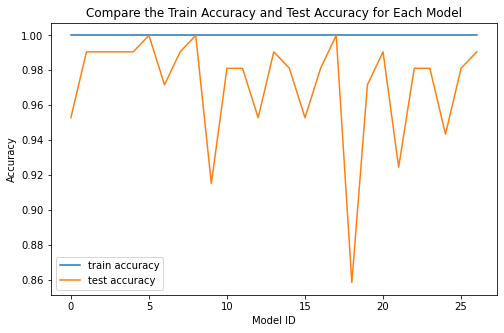

In [11]:
# set the width and height of the graph
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

labels = ["train accuracy", "test accuracy"]
models_num = list(range(0,27))
labels = ["train accuracy", "test accuracy"]
plt.plot(models_num, list(accuracy_df['train accuracy']), label = labels[0])
plt.plot(models_num, list(accuracy_df['test accuracy']), label = labels[1])

plt.legend()
plt.xlabel("Model ID")
plt.ylabel("Accuracy")
plt.title ("Compare the Train Accuracy and Test Accuracy for Each Model")
plt.show()

# Investigate the Impact of Individual Hyperparameter on Testing Accuracy

In [12]:
"""Investigate the impact of batch size"""
test_accuracy_b = []
for b in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]:
        initializer = initializers.RandomUniform(minval = 0, maxval = 0.1, seed=None)
        nn_model = Sequential ()
        nn_model.add (Dense(20, input_dim = train_X.shape[1], activation = 'relu', kernel_initializer = initializer) )  # hidden layer: a dense layer that is fully connected
        nn_model.add(Dense(1, activation = 'sigmoid', kernel_initializer = initializer))   # ouput layer
        # define optimiser and initialise weights 
        opt = keras.optimizers.Adam(learning_rate = 0.01)
        # compile the model
        nn_model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
        # fit the model 
        nn_model.fit (train_X, train_y, epochs = 50, batch_size = b, verbose = 0)
        y_pred = nn_model.predict_classes(test_X)
        test_accuracy_b.append(accuracy_score (test_y, y_pred))


In [13]:
test_accuracy_b

[0.9905660377358491,
 0.9905660377358491,
 0.9811320754716981,
 0.9905660377358491,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9905660377358491,
 0.9716981132075472,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981]

In [14]:
"""investigate the number of iterations"""
test_accuracy_e = []
for e in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]:
        initializer = initializers.RandomUniform(minval = 0, maxval = 0.1, seed=None)
        nn_model = Sequential ()
        nn_model.add (Dense(20, input_dim = train_X.shape[1], activation = 'relu', kernel_initializer = initializer) )  # hidden layer: a dense layer that is fully connected
        nn_model.add(Dense(1, activation = 'sigmoid', kernel_initializer = initializer))   # ouput layer
        # define optimiser and initialise weights 
        opt = keras.optimizers.Adam(learning_rate = 0.01)
        # compile the model
        nn_model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
        # fit the model 
        nn_model.fit (train_X, train_y, epochs = e, batch_size = 50, verbose = 0)
        y_pred = nn_model.predict_classes(test_X)
        test_accuracy_e.append(accuracy_score (test_y, y_pred))

In [15]:
test_accuracy_e

[0.9811320754716981,
 0.9905660377358491,
 0.9811320754716981,
 0.9811320754716981,
 0.9811320754716981,
 0.9905660377358491,
 0.9811320754716981,
 0.9905660377358491,
 0.9905660377358491,
 0.9811320754716981,
 0.9905660377358491,
 0.9905660377358491,
 0.9811320754716981,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 1.0,
 0.9905660377358491]

In [16]:
"""investigate the number of hidden units"""
test_accuracy_h = []
for h in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]:
        initializer = initializers.RandomUniform(minval = 0, maxval = 0.1, seed=None)
        nn_model = Sequential ()
        nn_model.add (Dense(h, input_dim = train_X.shape[1], activation = 'relu', kernel_initializer = initializer) )  # hidden layer: a dense layer that is fully connected
        nn_model.add(Dense(1, activation = 'sigmoid', kernel_initializer = initializer))   # ouput layer
        # define optimiser and initialise weights 
        opt = keras.optimizers.Adam(learning_rate = 0.01)
        # compile the model
        nn_model.compile (loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
        # fit the model 
        nn_model.fit (train_X, train_y, epochs = 50, batch_size = 50, verbose = 0)
        y_pred = nn_model.predict_classes(test_X)
        test_accuracy_h.append(accuracy_score (test_y, y_pred))

In [17]:
test_accuracy_h

[0.9528301886792453,
 0.9811320754716981,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 1.0,
 0.9905660377358491,
 0.9811320754716981,
 0.9905660377358491,
 1.0,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9905660377358491,
 0.9811320754716981,
 0.9811320754716981,
 0.9905660377358491]

###  Plot Impact of Hyperparameters

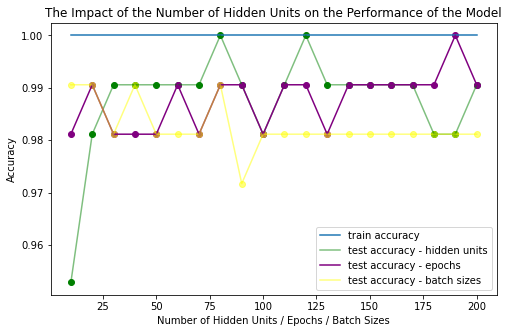

In [27]:
# set the width and height of the graph
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

train_accuracy_plot = [1] * 20
X = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
plt.plot(X, train_accuracy_plot, label = labels[0])
plt.plot(X, test_accuracy_h, label = "test accuracy - hidden units", c = 'green', alpha = 0.5)
plt.scatter(X, test_accuracy_h, c='green')
plt.plot(X, test_accuracy_e, label = "test accuracy - epochs", c = "purple")
plt.scatter(X, test_accuracy_e, c='purple')
plt.plot(X, test_accuracy_b, label = "test accuracy - batch sizes", c = 'yellow', alpha = 0.5)
plt.scatter(X, test_accuracy_b, c= 'yellow', alpha = 0.5)

      
plt.legend()
plt.xlabel("Number of Hidden Units / Epochs / Batch Sizes")
plt.ylabel("Accuracy")
plt.title ("The Impact of the Number of Hidden Units on the Performance of the Model")
plt.show()


# Discussion of How Chosen Hyperparameters Impact the Testing Accuracy

I have tuned three parameters of the keras model, namely epochs, batch size and the number of hidden units. It is found that the model results in the best performace when batch_size = 30, epochs = 100 and hidden_units = 50, as shown by the result of the 5-fold cross validation. 

It seems that the neural network with any combination of these three hyperparameters overfits the training data as the each of the 27 models perfectly fit the training data. 

On the other hand, the testing accuracy increases when the number of hidden units increase to 75 and fluntuautes afterwards. This could be because the model becomes more complex as the number of hidden units increase, which makes the model more and more sensitive to noise in the data. It decreases the generalisiability of the model and thus might on some occasions result in poor performace of the model. 

However, the number of iteration does not seem to have an impact on the testing accuracy because the testing accuracy do not indicate a consistent trend. This is counter-intuitive becuase we expect to see more accurate predictions if the model is subject to more optimisations. 

Finally, testing accuracy appears to be negatively associated with batch size and converge as batch size grow over 100 for this dataset. 

